## RESEAU LINKDIN

In [6]:
import pandas as pd 
df = pd.read_csv("linkedin_data.csv")

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:

df


,First Name,Last Name,Company,Position,Connected On
0,Anastasia,Gorina,Prime Clerk,Data Analyst,22 Feb 2021
1,Michael,Duncan,DispatchHealth,Jr. Machine Learning Engineer,22 Feb 2021
2,Cansu,CANDAN,KTU Artificial Intelligence Society,Member Of The Management Board,22 Feb 2021
3,Richard,Pisano,Springboard,Data Analyst,22 Feb 2021
4,Arbak,Aydemir,Apple,AI/ML - Annotation Analyst,22 Feb 2021
...,...,...,...,...,...
1029,Soomin,Kim (金受玟),"The Chinese University of Hong Kong, Shenzhen ...",Case Competition Team (2019-20) Member,21 May 2020
1030,Glenys Charity,Lion,PPSD Surabaya,Head of Sports Department,21 May 2020
1031,Natasha,Celia,Perhimpunan Pelajar Indonesia (PPI) Tiongkok,Staff of Cadre Education Division,21 May 2020
1032,Jordan,Nathaniel,J.P. Morgan,Chase Commercial Banking Virtual Program,21 May 2020


In [8]:
NewData = df.groupby('Company')[['First Name', 'Last Name']].size().reset_index(name='Count')


NewData = NewData.sort_values(by="Count", ascending=False)


NewData

,Company,Count
636,"The Chinese University of Hong Kong, Shenzhen ...",30
644,The Sparks Foundation,12
481,Perhimpunan Pelajar Indonesia (PPI) Tiongkok,12
660,Towards Data Science,12
38,Amazon,7
...,...,...
281,Hangzhou Indonesian Student Community,1
282,Happy Chinese World,1
283,Heap,1
284,Helium 10,1


In [9]:
my_name = "Anastasia Gorina"

NewData['My Name'] = my_name

Nombre de nœuds dans le graphe : 26
Nombre d'arêtes dans le graphe : 25


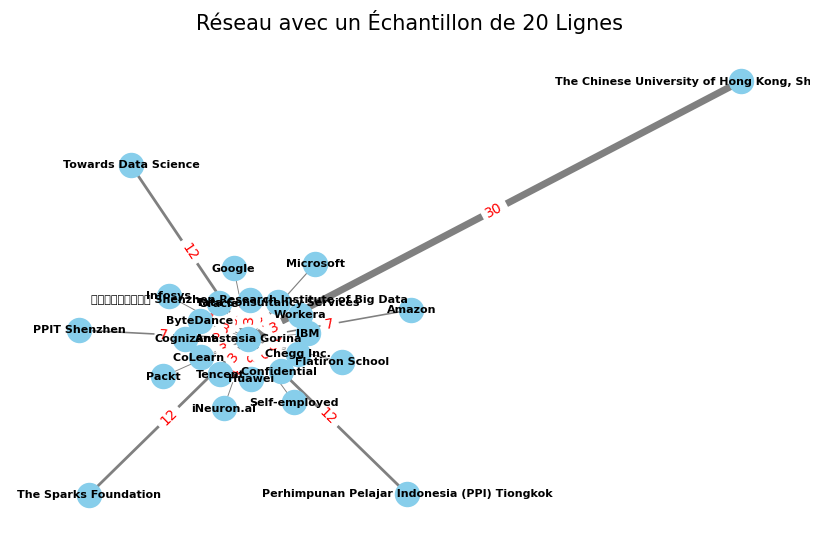

In [ ]:

sample_data = NewData.head(25)


G = nx.Graph()


my_name = sample_data['My Name'].iloc[0]
G.add_node(my_name)

for index, row in sample_data.iterrows():
    company = row['Company']
    count = row['Count']
    G.add_node(company)
    G.add_edge(my_name, company, weight=count)

print(f"Nombre de nœuds dans le graphe : {len(G.nodes)}")
print(f"Nombre d'arêtes dans le graphe : {len(G.edges)}")


plt.figure(figsize=(8, 5))
pos = nx.kamada_kawai_layout(G)


weights = [G[u][v]['weight'] for u, v in G.edges()]
edge_width = [w / max(weights) * 5 for w in weights]  # Normalisation

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=300,
    node_color="skyblue",
    font_size=8,
    font_weight="bold",
    edge_color="gray",
    width=edge_width,
)


edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

plt.title("Réseau avec un Échantillon de 20 Lignes", fontsize=15)
plt.show()